In [ ]:
from pyspark.sql import SparkSession


spark_session_low_perf = SparkSession.builder\
        .master("spark://192.168.2.43:7077") \
        .appName("Analytics_SG")\
        .config("spark.dynamicAllocation.enabled", True)\
        .config("spark.dynamicAllocation.shuffleTracking.enabled",True)\
        .config("spark.dynamicAllocation.executorIdleTimeout","30s")\
        .config("spark.executor.instances", 1)\
        .config("spark.cores.max", 1)\
        .getOrCreate()

In [ ]:
from pyspark.sql import SparkSession


spark_session_single_executor = SparkSession.builder\
        .master("spark://192.168.2.43:7077") \
        .appName("Analytics_SG")\
        .config("spark.dynamicAllocation.enabled", True)\
        .config("spark.dynamicAllocation.shuffleTracking.enabled",True)\
        .config("spark.dynamicAllocation.executorIdleTimeout","30s")\
        .config("spark.executor.instances", 1)\
        .getOrCreate()

In [ ]:
from pyspark.sql import SparkSession


spark_session_two_executors_low_perf = SparkSession.builder\
        .master("spark://192.168.2.43:7077") \
        .appName("Analytics_SG")\
        .config("spark.dynamicAllocation.enabled", True)\
        .config("spark.dynamicAllocation.shuffleTracking.enabled",True)\
        .config("spark.dynamicAllocation.executorIdleTimeout","30s")\
        .config("spark.executor.instances", 2)\
        .config("spark.cores.max", 2)\
        .getOrCreate()

In [1]:
from pyspark.sql import SparkSession


spark_session_max = SparkSession.builder\
        .master("spark://192.168.2.43:7077") \
        .appName("Analytics_SG")\
        .config("spark.dynamicAllocation.enabled", True)\
        .config("spark.dynamicAllocation.shuffleTracking.enabled",True)\
        .config("spark.dynamicAllocation.executorIdleTimeout","30s")\
        .config("spark.executor.instances", 2)\
        .config("spark.cores.max", 4)\
        .getOrCreate()

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


23/03/22 04:22:59 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [2]:
df = spark_session_max.read.csv("hdfs://192.168.2.43:9000/user/root/data/2000/merge.csv", header = True)

In [3]:
df.printSchema()

root
 |-- STATION: string (nullable = true)
 |-- DATE: string (nullable = true)
 |-- SOURCE: string (nullable = true)
 |-- LATITUDE: string (nullable = true)
 |-- LONGITUDE: string (nullable = true)
 |-- ELEVATION: string (nullable = true)
 |-- NAME: string (nullable = true)
 |-- REPORT_TYPE: string (nullable = true)
 |-- CALL_SIGN: string (nullable = true)
 |-- QUALITY_CONTROL: string (nullable = true)
 |-- WND: string (nullable = true)
 |-- CIG: string (nullable = true)
 |-- VIS: string (nullable = true)
 |-- TMP: string (nullable = true)
 |-- DEW: string (nullable = true)
 |-- SLP: string (nullable = true)
 |-- AA1: string (nullable = true)
 |-- AY1: string (nullable = true)
 |-- AY2: string (nullable = true)
 |-- GA1: string (nullable = true)
 |-- GF1: string (nullable = true)
 |-- KA1: string (nullable = true)
 |-- MA1: string (nullable = true)
 |-- MD1: string (nullable = true)
 |-- MW1: string (nullable = true)
 |-- OA1: string (nullable = true)
 |-- OA2: string (nullable = true

In [4]:
df.head()

23/03/22 04:23:19 WARN package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


Row(STATION='01001099999', DATE='2000-01-01T00:00:00', SOURCE='4', LATITUDE='70.9333333', LONGITUDE='-8.6666667', ELEVATION='9.0', NAME='JAN MAYEN NOR NAVY, NO', REPORT_TYPE='FM-12', CALL_SIGN='ENJA ', QUALITY_CONTROL='V020', WND='210,1,N,0021,1', CIG='00210,1,9,N', VIS='002500,1,N,1', TMP='+0010,1', DEW='+0003,1', SLP='09818,1', AA1='06,0041,9,1', AY1='8,1,06,1', AY2='5,1,06,1', GA1=None, GF1='08,99,1,08,1,06,1,00250,1,99,9,99,9', KA1=None, MA1='99999,9,09806,1', MD1='5,1,007,1,+999,9', MW1='50,1', OA1=None, OA2=None, SA1=None, UA1=None, REM='SYN088AAXX  01004 01001 11325 82104 10010 20003 39806 49818 55007 60041 75085 886// 333 91119;', EQD=None)

In [5]:
from pyspark.sql.functions import split, col
import time

start = time.time()
#splitting SLP column to extract value and casting it to Integer
df = df.withColumn('SLP_value', split(col('SLP'), ',').getItem(0).cast('float'))

In [6]:
df.printSchema()

root
 |-- STATION: string (nullable = true)
 |-- DATE: string (nullable = true)
 |-- SOURCE: string (nullable = true)
 |-- LATITUDE: string (nullable = true)
 |-- LONGITUDE: string (nullable = true)
 |-- ELEVATION: string (nullable = true)
 |-- NAME: string (nullable = true)
 |-- REPORT_TYPE: string (nullable = true)
 |-- CALL_SIGN: string (nullable = true)
 |-- QUALITY_CONTROL: string (nullable = true)
 |-- WND: string (nullable = true)
 |-- CIG: string (nullable = true)
 |-- VIS: string (nullable = true)
 |-- TMP: string (nullable = true)
 |-- DEW: string (nullable = true)
 |-- SLP: string (nullable = true)
 |-- AA1: string (nullable = true)
 |-- AY1: string (nullable = true)
 |-- AY2: string (nullable = true)
 |-- GA1: string (nullable = true)
 |-- GF1: string (nullable = true)
 |-- KA1: string (nullable = true)
 |-- MA1: string (nullable = true)
 |-- MD1: string (nullable = true)
 |-- MW1: string (nullable = true)
 |-- OA1: string (nullable = true)
 |-- OA2: string (nullable = true

In [7]:
from pyspark.sql.functions import regexp_extract, col

df = df.withColumn("DEW_value", regexp_extract(col("DEW"), "\\+(\\d+),", 1).cast("float"))
df = df.withColumn("TMP_value", regexp_extract(col("TMP"), "\\+(\\d+),", 1).cast("float"))

In [8]:
df.printSchema()

root
 |-- STATION: string (nullable = true)
 |-- DATE: string (nullable = true)
 |-- SOURCE: string (nullable = true)
 |-- LATITUDE: string (nullable = true)
 |-- LONGITUDE: string (nullable = true)
 |-- ELEVATION: string (nullable = true)
 |-- NAME: string (nullable = true)
 |-- REPORT_TYPE: string (nullable = true)
 |-- CALL_SIGN: string (nullable = true)
 |-- QUALITY_CONTROL: string (nullable = true)
 |-- WND: string (nullable = true)
 |-- CIG: string (nullable = true)
 |-- VIS: string (nullable = true)
 |-- TMP: string (nullable = true)
 |-- DEW: string (nullable = true)
 |-- SLP: string (nullable = true)
 |-- AA1: string (nullable = true)
 |-- AY1: string (nullable = true)
 |-- AY2: string (nullable = true)
 |-- GA1: string (nullable = true)
 |-- GF1: string (nullable = true)
 |-- KA1: string (nullable = true)
 |-- MA1: string (nullable = true)
 |-- MD1: string (nullable = true)
 |-- MW1: string (nullable = true)
 |-- OA1: string (nullable = true)
 |-- OA2: string (nullable = true

In [9]:
df.head()

Row(STATION='01001099999', DATE='2000-01-01T00:00:00', SOURCE='4', LATITUDE='70.9333333', LONGITUDE='-8.6666667', ELEVATION='9.0', NAME='JAN MAYEN NOR NAVY, NO', REPORT_TYPE='FM-12', CALL_SIGN='ENJA ', QUALITY_CONTROL='V020', WND='210,1,N,0021,1', CIG='00210,1,9,N', VIS='002500,1,N,1', TMP='+0010,1', DEW='+0003,1', SLP='09818,1', AA1='06,0041,9,1', AY1='8,1,06,1', AY2='5,1,06,1', GA1=None, GF1='08,99,1,08,1,06,1,00250,1,99,9,99,9', KA1=None, MA1='99999,9,09806,1', MD1='5,1,007,1,+999,9', MW1='50,1', OA1=None, OA2=None, SA1=None, UA1=None, REM='SYN088AAXX  01004 01001 11325 82104 10010 20003 39806 49818 55007 60041 75085 886// 333 91119;', EQD=None, SLP_value=9818.0, DEW_value=3.0, TMP_value=10.0)

In [10]:
# Select the TMP, DEW, and SLP columns
df_selected = df.select("TMP_value", "DEW_value", "SLP_value")

In [11]:
from pyspark.sql.functions import corr
import matplotlib.pyplot as plt

# Calculate the correlation between TMP and DEW
corr_tmp_dew = df_selected.select(corr("TMP_value", "DEW_value")).collect()[0][0]
print("Correlation between TMP and DEW: ", corr_tmp_dew)

Correlation between TMP and DEW:  0.7580761111075074


In [12]:
# Calculate the correlation between TMP and SLP
corr_tmp_slp = df_selected.select(corr("TMP_value", "SLP_value")).collect()[0][0]
print("Correlation between TMP and SLP: ", corr_tmp_slp)

Correlation between TMP and SLP:  0.08393156033583317


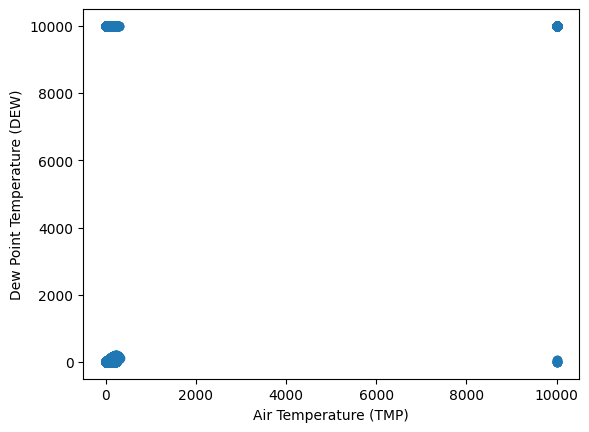

In [13]:
# Draw scatter plot for TMP-DEW
x = df_selected.select("TMP_value").rdd.flatMap(lambda x: x).collect()
y = df_selected.select("DEW_value").rdd.flatMap(lambda x: x).collect()
plt.scatter(x, y)
plt.xlabel("Air Temperature (TMP)")
plt.ylabel("Dew Point Temperature (DEW)")
plt.show()

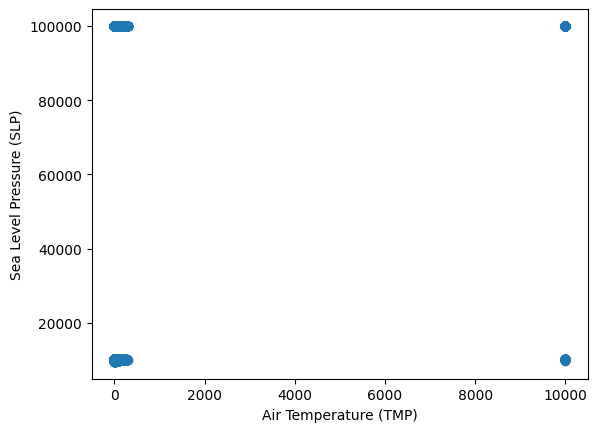

Specific configuration took 15.33 seconds


In [14]:
# Draw scatter plot for TMP-SLP
x = df_selected.select("TMP_value").rdd.flatMap(lambda x: x).collect()
y = df_selected.select("SLP_value").rdd.flatMap(lambda x: x).collect()
plt.scatter(x, y)
plt.xlabel("Air Temperature (TMP)")
plt.ylabel("Sea Level Pressure (SLP)")
plt.show()

end = time.time()
print(f"Specific configuration took {end-start:.2f} seconds")